In [3]:
'''** 1)-->Load in the appropriate csv file as a pandas dataframe (batting.csv)**'''

'** 1)-->Load in the appropriate csv file as a pandas dataframe (batting.csv)**'

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Batting.csv")

In [4]:
'''2)	Print out the dimensions and info about the dataframe you just created'''
df.dtypes

playerID      object
nameFirst     object
nameLast      object
birthYear      int64
yearID         int64
stint          int64
teamID        object
lgID          object
G              int64
AB             int64
R              int64
H              int64
2B             int64
3B             int64
HR             int64
RBI          float64
SB           float64
CS           float64
BB             int64
SO           float64
IBB          float64
HBP          float64
SH           float64
SF           float64
GIDP         float64
dtype: object

In [5]:
'''3)	How many players have hit 40 or more HRs in one single season? (Number only)'''
df[df['HR']>=40]['HR'].count()

326

In [6]:
'''4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)'''
df2=df.groupby(["playerID","nameFirst","nameLast"],as_index=False).agg({'HR':np.sum})
df2[df2['HR']>=600][['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
1,Hank,Aaron,755
1542,Barry,Bonds,762
6633,Ken,Griffey,630
10857,Willie,Mays,660
14528,Alex,Rodriguez,696
14865,Babe,Ruth,714
16103,Sammy,Sosa,609
17004,Jim,Thome,612


In [7]:
'''5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)'''
df[(df['2B']>=40) &(df['3B']>=10) & (df['H']>=200) & (df['HR']>=30)]["playerID"].nunique()

11

In [23]:
'''6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )'''
df[(df['SB']>=100)][['nameFirst','nameLast','yearID','SB']].sort_values(by=['SB'],ascending=False)[['nameFirst','nameLast','SB']]

,nameFirst,nameLast,SB
3667,Hugh,Nicol,138.0
59616,Rickey,Henderson,130.0
3617,Arlie,Latham,129.0
51853,Lou,Brock,118.0
3501,Charlie,Comiskey,117.0
3764,John,Ward,111.0
4278,Billy,Hamilton,111.0
5232,Billy,Hamilton,111.0
62410,Vince,Coleman,110.0
64425,Vince,Coleman,109.0


In [22]:
'''7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)'''
df1=df[(df['yearID']>=1960) & (df['yearID']<=1969)].groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'HR':np.sum})
df1[df1['HR']>=200].sort_values(by=['HR'],ascending=False)[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
856,Harmon,Killebrew,393
0,Hank,Aaron,375
1044,Willie,Mays,350
1372,Frank,Robinson,316
1057,Willie,McCovey,300
751,Frank,Howard,288
279,Norm,Cash,278
70,Ernie,Banks,269
1009,Mickey,Mantle,256
283,Orlando,Cepeda,254


In [21]:
'''8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)'''
df.groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'HR':np.sum}).sort_values(by=['HR'],ascending=False)[['nameFirst','nameLast','HR']].head(1)

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


In [18]:
'''9)	Who had the most hits (H) in the 1970s? (Dataframe)'''
df[(df['yearID']>=1970) & (df['yearID']<=1979)].groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'H':np.sum}).sort_values(by=['H'],ascending=False)[['nameFirst','nameLast','H']].head(1)

,nameFirst,nameLast,H
1639,Pete,Rose,2045


In [15]:
'''10)	Top 5 highest OBP (on base percentage)[On-base percentage is calculated using this formula[2][3][4]:

{\displaystyle OBP={\frac {H+BB+HBP}{AB+BB+HBP+SF}}} OBP={\frac  {H+BB+HBP}{AB+BB+HBP+SF}}
where

H = Hits
BB = Bases on Balls (Walks)
HBP = Hit By Pitch
AB = At bat
SF = Sacrifice fly-> according [1]->https://en.wikipedia.org/wiki/On-base_percentage] with at least 500 PAs[PA = AB + BB + HBP + SH + SF + Times Reached on Defensive Interference [2]->https://en.wikipedia.org/wiki/Plate_appearance in 1977? 
(Dataframe, first name, last name, OBP, ordered descending by OBP)'''
df['obp']=((df['H']+df['BB']+df['HBP'])/(df['AB']+df['BB']+df['HBP']+df['SF']))*100
df['PA']=df['AB']+df['BB']+df['HBP']+df['SF']+df['SH']
df[(df['PA']>=500)&(df['yearID']==1977)][['nameFirst','nameLast','obp']].sort_values(by=['obp'],ascending=False).head(5)

,nameFirst,nameLast,obp
54603,Rod,Carew,44.877345
55273,Ken,Singleton,43.778802
55280,Reggie,Smith,42.691030
54820,Mike,Hargrove,42.031250
55095,Joe,Morgan,41.705426


In [16]:
'''11)	Top 8 highest averages[avg=h/ab [1]->https://en.wikipedia.org/wiki/Batting_average] in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)'''
df['avg']=df['H']/df['AB']
df[(df['PA']>=300)&(df['yearID']==2013)][['playerID','nameFirst','nameLast','avg']].sort_values(by=['avg'],ascending=False)[['nameFirst','nameLast','avg']].head(8)

,nameFirst,nameLast,avg
97188,Miguel,Cabrera,0.347748
98062,Hanley,Ramirez,0.345395
97300,Michael,Cuddyer,0.331288
97825,Joe,Mauer,0.323596
98293,Mike,Trout,0.322581
97651,Chris,Johnson,0.321012
97437,Freddie,Freeman,0.319419
98043,Yasiel,Puig,0.319372


In [16]:
'''12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)'''
df[(df['yearID']>=1940) & (df['yearID']<=1949)].groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'H':np.sum}).sort_values(by=['H'],ascending=False)[['nameFirst','nameLast','H']]

,nameFirst,nameLast,H
138,Lou,Boudreau,1578
427,Bob,Elliott,1563
1576,Dixie,Walker,1512
1103,Stan,Musial,1432
390,Bobby,Doerr,1407
712,Tommy,Holmes,1402
33,Luke,Appling,1376
1127,Bill,Nicholson,1328
961,Marty,Marion,1310
239,Phil,Cavarretta,1304


In [17]:
'''13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)'''
df.groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'H':np.sum}).sort_values(by=['H'],ascending=False)[['nameFirst','nameLast','H']].head(1)

,nameFirst,nameLast,H
14719,Pete,Rose,4256


In [6]:
'''14->Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe'''
df.groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'stint':np.sum}).sort_values(by=['stint'],ascending=False).head(5)

,playerID,nameFirst,nameLast,stint
12394,newsobo01,Bobo,Newsom,39
11136,mcguide01,Deacon,McGuire,37
17944,weathda01,David,Weathers,34
7383,henderi01,Rickey,Henderson,33
11535,millebo04,Bob,Miller,32


In [7]:
'''15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here'''
df1=df.groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'H':np.sum,'HR':np.sum})
df1[(df1['H']>=3000)&(df1['HR']>=500)]['playerID'].count()

playerID     5
nameFirst    5
nameLast     5
H            5
HR           5
dtype: int64

In [25]:
'''16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here'''
df[(df['yearID']==1988)].groupby(['yearID'],as_index=False).agg({'HR':np.sum})[['HR']]


,HR
0,3180


In [26]:
'''17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average'''
df[(df['nameFirst']=='Wade') & (df['nameLast']=='Boggs') & (df['AB']>=500)].sort_values(by=['avg'],ascending=False)[['nameFirst','nameLast','avg']].head(3)

,nameFirst,nameLast,avg
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


In [27]:
'''18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP'''
df[(df['yearID']==1995) & (df['PA']>=400)].sort_values(by=['obp'],ascending=False)[['nameFirst','nameLast','obp']].head(10)

,nameFirst,nameLast,obp
73578,Edgar,Martinez,47.887324
73996,Frank,Thomas,45.440495
73611,Mark,McGwire,44.075829
73999,Jim,Thome,43.806104
73002,Barry,Bonds,43.149606
73875,Tim,Salmon,42.946708
73145,Chili,Davis,42.911877
73560,Dave,Magadan,42.755344
73495,Chuck,Knoblauch,42.448331
73671,Tim,Naehring,41.472868


In [28]:
'''19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs'''
df[(df['yearID'].isin([1922,1925,1926,1928]))].groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({'3B':np.sum}).sort_values(by=['3B'],ascending=False)[['nameFirst','nameLast','3B']].head(1)

,nameFirst,nameLast,3B
1011,Curt,Walker,59


In [29]:
'''20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here'''
df[(df['HR']>=30) & (df['SB']>=30)][['playerID']].nunique()

playerID    37
dtype: int64

In [30]:
'''21)	 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)'''
df[(df['yearID']==1986) & (df['AB']>=400)][['playerID','nameFirst','nameLast','obp']].sort_values(by=['obp'],ascending=False).head(1)

,playerID,nameFirst,nameLast,obp
63320,boggswa01,Wade,Boggs,45.283019


In [31]:
'''22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)'''
df[(df['yearID']==1997) & (df['AB']>=400) & (df['lgID']=='NL')][['playerID','nameFirst','nameLast','obp']].sort_values(by=['obp'],ascending=False).head(1)

,playerID,nameFirst,nameLast,obp
76562,walkela01,Larry,Walker,45.180723


In [32]:
'''23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)'''
mean=df[(df['AB']>=500) & (df['yearID']==2012)][['HR']].mean()[0]
df[(df['HR']>=mean) & (df['AB']<=500)&(df['yearID']==2012)].sort_values(by=['HR'],ascending=False)[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
96820,Giancarlo,Stanton,37
96714,Wilin,Rosario,28
95668,Jose,Bautista,27
96611,A. J.,Pierzynski,27
96251,Garrett,Jones,27
96360,Ryan,Ludwick,26
96736,Jarrod,Saltalamacchia,25
96614,Trevor,Plouffe,24
96497,Mike,Napoli,24
96857,Mark,Teixeira,24


In [33]:
'''Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)'''
df['age_at_season']=df['yearID']-df['birthYear']
df[(df['HR']>=50)].sort_values(by=['age_at_season'])[['nameFirst','nameLast','HR','yearID','age_at_season']].head(1)

,nameFirst,nameLast,HR,yearID,age_at_season
89082,Prince,Fielder,50,2007,23


In [40]:
'''25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)'''
df1=df.groupby(by=['playerID','nameFirst','nameLast','yearID','age_at_season'])['H'].sum().groupby(level=[0]).cumsum()
df2=df1.reset_index()
df3=df2[(df2['H']>=300)]
df3.groupby(['playerID','nameFirst','nameLast','yearID'],as_index=False).agg({'age_at_season':'min'}).sort_values(by=['age_at_season']).head(5)

,playerID,nameFirst,nameLast,yearID,age_at_season
16562,ottme01,Mel,Ott,1929,20
0,aaronha01,Hank,Aaron,1955,21
5160,davisge01,George,Davis,1891,21
9948,hinespa01,Paul,Hines,1876,21
10215,hornsro01,Rogers,Hornsby,1917,21


C:\Users\rhitvij\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


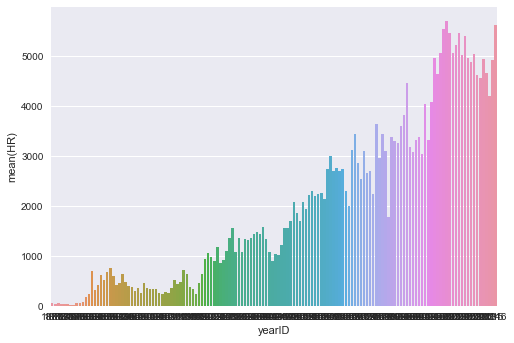

In [44]:
'''Graph total HRs per season using bar graph'''
df1=df.groupby(['yearID'],as_index=False).agg({'HR':np.sum}).sort_values(by=['HR'])
import seaborn as sns
import matplotlib.pyplot as plt
pt=sns.barplot(x="yearID",y='HR', data=df1 )
plt.show()

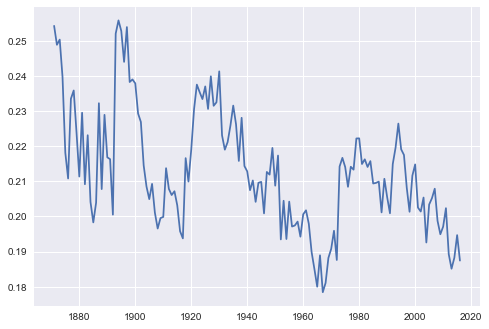

In [14]:
'''Using a line graph please graph the average HRs per AB (think about this) per season'''
import seaborn as sns
import matplotlib.pyplot as plt
df1=df.groupby('yearID',as_index=False).agg({'avg':'mean'})
plt.plot(df1['yearID'],df1['avg'])
plt.show()